# Программирование на `C++` и `python`
## Лекция 8. `matplotlib`

Воробьев Виталий Сергеевич, 8 декабря 2021

## Что такое SciPy?
* A Python-based ecosystem of open-source software for mathematics, science, and engineering
* Как произносить: “Sigh Pie” («Сай-пай»)
* Сайт: [scipy.org](scipy.org)
* Что почитать:
 * [docs.scipy.org](docs.scipy.org)
 * [scipy-lectures.org](scipy-lectures.org)
 * [github.com/jakevdp/PythonDataScienceHandbook](github.com/jakevdp/PythonDataScienceHandbook)


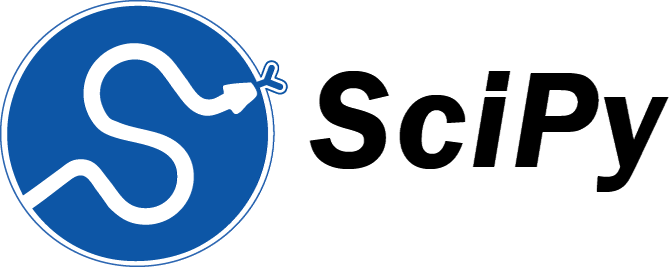

* `NumPy` – пакет для работы с многомерными массивами. Фундамент стека SciPy
* `SciPy library` – библиотека для научных вычислений
* `Matplotlib` – мощная библиотека для 2D рисования
* `pandas` – инструменты для хранения и анализа данных
* `Sympy` – символьная математика
* `IPython` – улучшенная интерактивная консоль

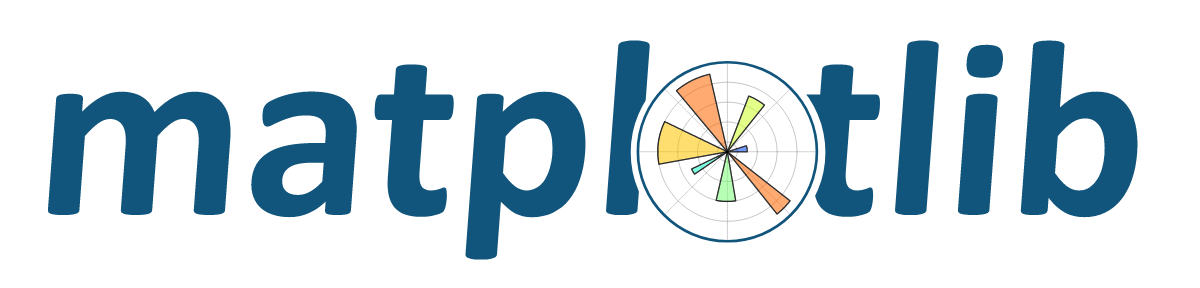

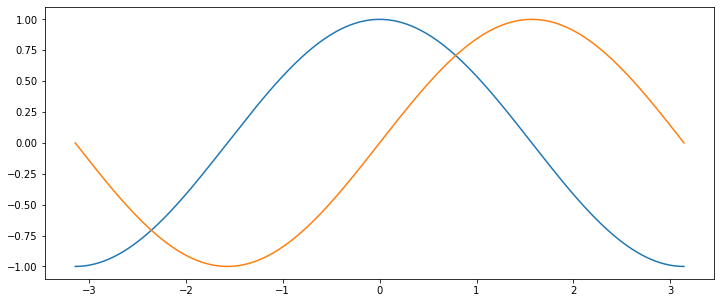

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
figsize=(12, 5)

x = np.linspace(-np.pi, np.pi, 256)
plt.figure(figsize=figsize)
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x));

### Стиль линии
* Короткая форма: `fmt = '[marker][line][color]'`
* Полная форма: `linestyle`, `linewidth`, `color`

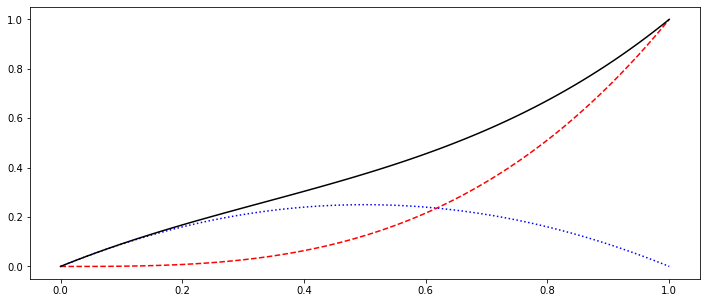

In [2]:
x = np.linspace(0, 1, 100)
f1 = 0.25 - (x - 0.5)**2
f2 = x**3
plt.figure(figsize=figsize)
plt.plot(x, f1, ':b')     # пунктирная синяя линия
plt.plot(x, f2, '--r')    # штрихованная красная линия
plt.plot(x, f1+f2, 'k');  # черная непрерывная линия

### Стиль маркера
* Короткая форма: `fmt = '[marker][line][color]'`
* Полная форма: `marker`, `markersize`, `color`

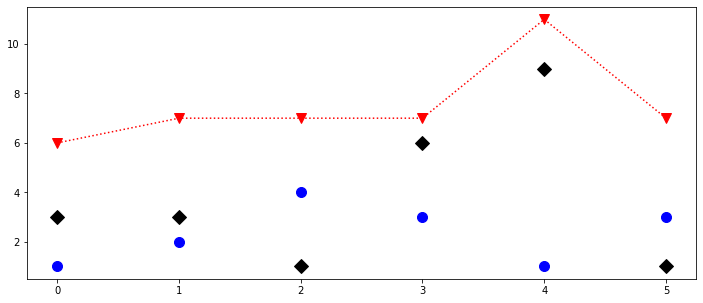

In [3]:
rg = np.random.default_rng(seed=3)
plt.figure(figsize=figsize)
plt.plot(rg.binomial(10, 0.3, 6), 'ob', markersize=10)  # синие круги
plt.plot(rg.poisson(7, 6),       'v:r', markersize=10)  # красные треугольники, пунктирная линия
plt.plot(rg.integers(0, 10, 6),   'Dk', markersize=10); # черные ромбы

## Визуализация погрешностей

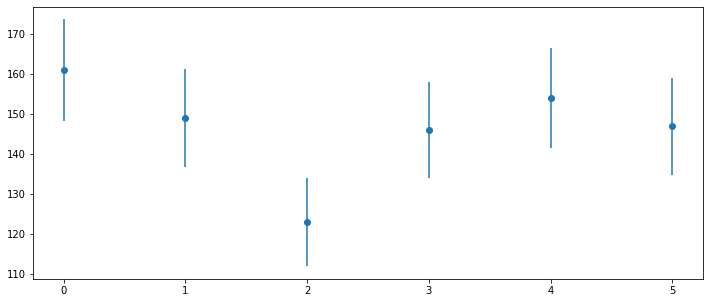

In [4]:
rg = np.random.default_rng(seed=5)
x = np.arange(6)
y = rg.poisson(149, x.size)
plt.figure(figsize=figsize)
plt.errorbar(x, y, yerr=np.sqrt(y), marker='o', linestyle='none');

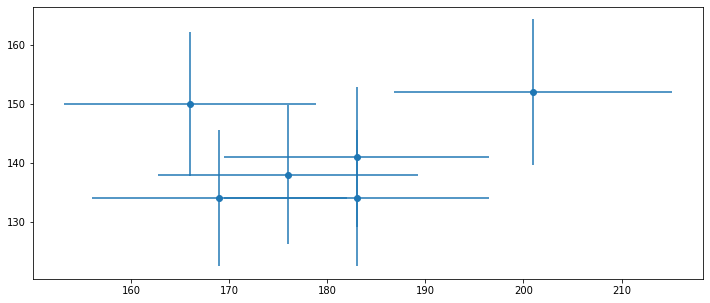

In [5]:
rg = np.random.default_rng(seed=10)
N = 6
x = rg.poisson(169, N)
y = rg.poisson(149, N)
plt.figure(figsize=figsize)
plt.errorbar(x, y, xerr=np.sqrt(x), yerr=np.sqrt(y), fmt='o');

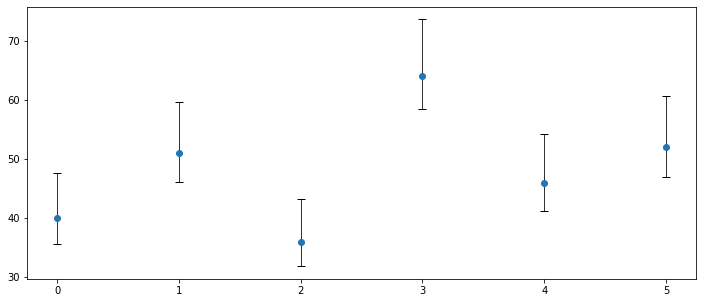

In [6]:
rg = np.random.default_rng(seed=11)
y = rg.poisson(49, 6)
yerr = [0.7 * np.sqrt(y), 1.2 * np.sqrt(y)]
plt.figure(figsize=figsize)
plt.errorbar(range(y.size), y, yerr=yerr, fmt='o', ecolor='k', elinewidth=0.8, capsize=4, capthick=1);

## Настройка осей
* Диапазон значений: `xlim`, `ylim`
* Размер шрифта: `fontsize`
* Подписи осей: `xlabel`, `ylabel`
* Заголовок: `title`

In [9]:
import matplotlib
matplotlib.rcParams['font.size'] = 14  # размер шрифта по умолчанию

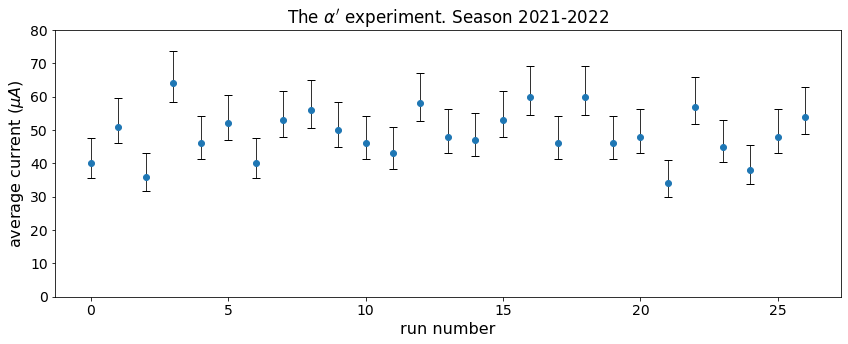

In [14]:
rg = np.random.default_rng(11)
y = rg.poisson(49, 27)
yerr = (0.7 * np.sqrt(y), 1.2 * np.sqrt(y))
plt.figure(figsize=figsize)
plt.errorbar(range(y.size), y, yerr=yerr, fmt='o', ecolor='k', elinewidth=0.8, capsize=4, capthick=1)

plt.xlabel('run number', fontsize=16)
plt.ylabel(r'average current ($\mu A$)', fontsize=16)
plt.title(r'The $\alpha^\prime$ experiment. Season 2021-2022')

plt.ylim((0, 80))
plt.tight_layout()

### Легенда

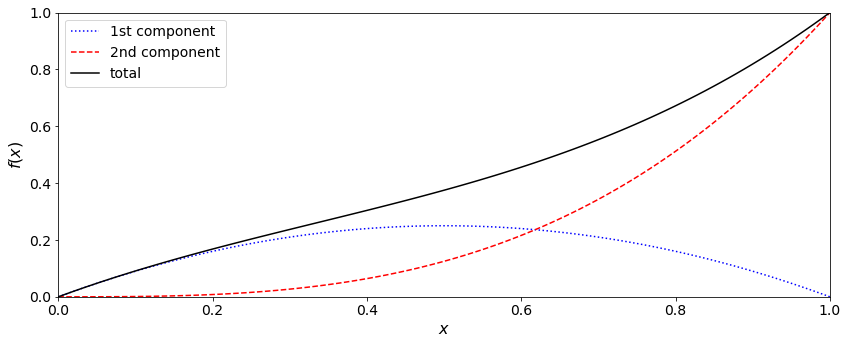

In [18]:
x = np.linspace(0, 1, 100)
f1, f2 = 0.25 - (x - 0.5)**2, x**3
plt.figure(figsize=figsize)
plt.plot(x, f1, ':b', label='1st component')
plt.plot(x, f2, '--r', label='2nd component')
plt.plot(x, f1+f2, 'k', label='total')
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$f(x)$', fontsize=16)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(fontsize=14)  # легенда
plt.tight_layout()

## Сетка
* Основная сетка
* Дополнительная сетка
* Стиль линии

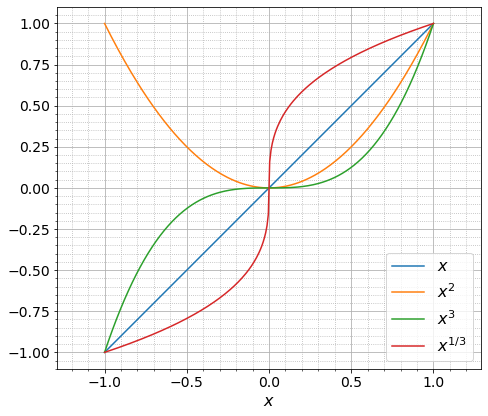

In [22]:
x = np.linspace(-1, 1, 250)
plt.figure(figsize=(7, 6))
for y, lbl in zip([x, x**2, x**3, np.cbrt(x)], [r'$x$', r'$x^2$', r'$x^3$', r'$x^{1/3}$']):
    plt.plot(x, y, label=lbl)
plt.legend(fontsize=16)
plt.minorticks_on()  # включаем дополнительные отметки на осях
plt.xlabel(r'$x$', fontsize=16)
plt.xlim((-1., 1.))
plt.ylim((-1., 1.))
plt.grid(which='major')                # включаем основную сетку
plt.grid(which='minor', linestyle=':') # включаем дополнительную сетку
plt.axis('equal')
plt.tight_layout()

## Логарифмический масштаб

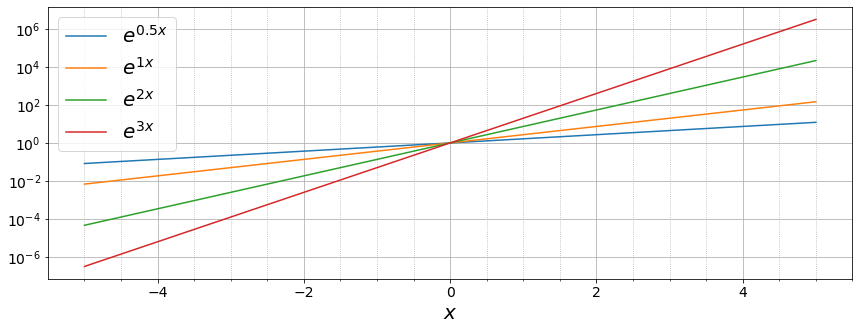

In [24]:
x = np.linspace(-5, 5, 250)
plt.figure(figsize=figsize)
for coef in [0.5, 1, 2, 3]:
    plt.plot(x, np.exp(coef*x), label=fr'$e^{{{coef}x}}$')
plt.legend(fontsize=20)

plt.xlabel(r'$x$', fontsize=20)
plt.minorticks_on()  # включаем дополнительные отметки на осях
plt.grid(which='major')                # включаем основную сетку
plt.grid(which='minor', linestyle=':') # включаем дополнительную сетку
plt.tight_layout();
plt.semilogy();

## Меняем отметки на осях

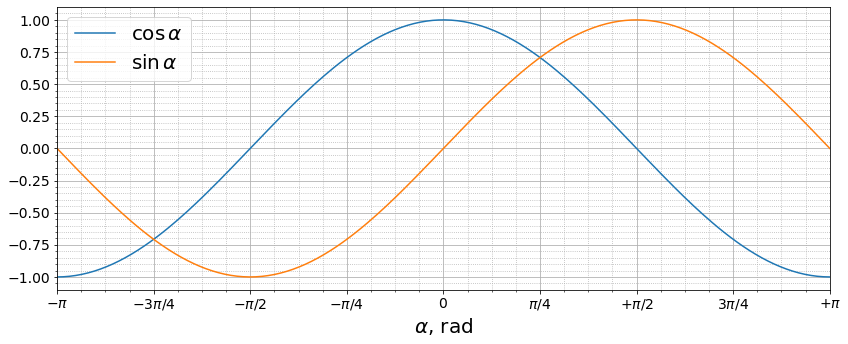

In [25]:
x = np.linspace(-np.pi, np.pi, 250)
plt.figure(figsize=figsize)
plt.plot(x, np.cos(x), label=r'$\cos{\alpha}$')
plt.plot(x, np.sin(x), label=r'$\sin{\alpha}$')
plt.xlim((x.min(), x.max()))
plt.legend(fontsize=20)
plt.xlabel(r'$\alpha$, rad', fontsize=20)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xticks(np.linspace(-np.pi, np.pi, 9), [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$',
                                           r'$0$', r'$\pi/4$', r'$+\pi/2$', r'$3\pi/4$', r'$+\pi$'])
plt.tight_layout();

## Гистограммы

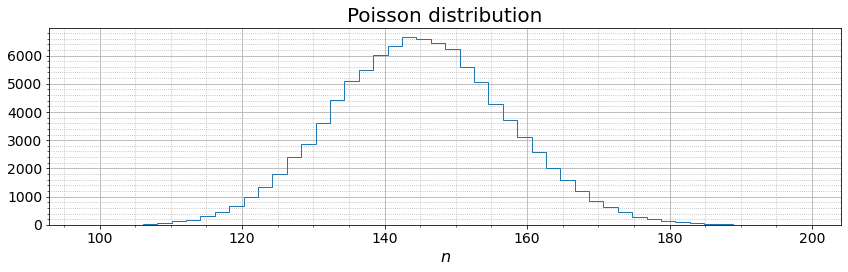

In [34]:
rg = np.random.default_rng(11)
data = rg.poisson(145, 10**5)
plt.figure(figsize=(12, 4))
nbins = data.max() - data.min()
# plt.hist(data, bins=nbins // 2, alpha=0.5)  #, histtype='step')
plt.hist(data, bins=nbins // 2, histtype='step')
plt.xlabel(r'$n$', fontsize=16)
plt.title('Poisson distribution', fontsize=20)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout();

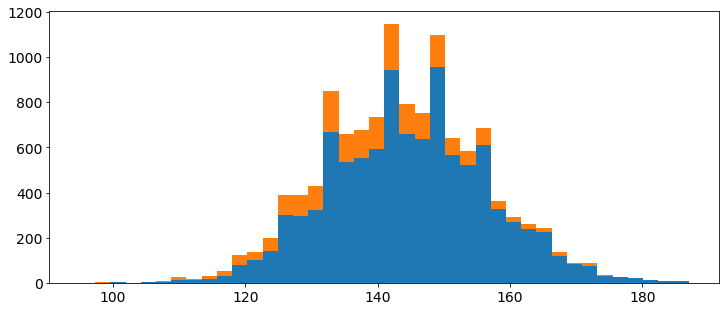

In [39]:
rg = np.random.default_rng(11)
data1 = rg.poisson(145, 10**4)
data2 = rg.poisson(140, 2*10**3)

plt.figure(figsize=figsize)
# plt.hist([data1, data2], bins=40);
# plt.hist([data1, data2], bins=40, histtype='step');
plt.hist([data1, data2], bins=40, stacked=True);

## Диаграммы рассеяния

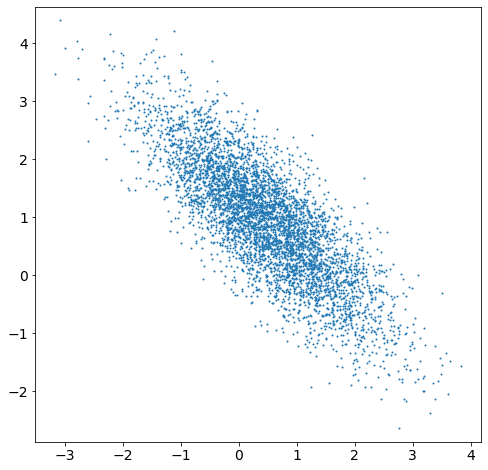

In [46]:
rg = np.random.default_rng(11)
means, covar = (0.5, 0.9), [[1., -0.8], [-0.8, 1.]]
data = rg.multivariate_normal(means, covar, 5000)

plt.figure(figsize=(8,8))
plt.axis('equal')
plt.scatter(data[:,0], data[:,1], marker='o', s=1);

Визуализация пятимерных данных с помощью диаграмм рассеяния:
* `(x, y)` - две координаты
* `s` - размер маркера
* `c` - цвет маркера
* `marker` - тип маркера - пятое, дискретное, измерение

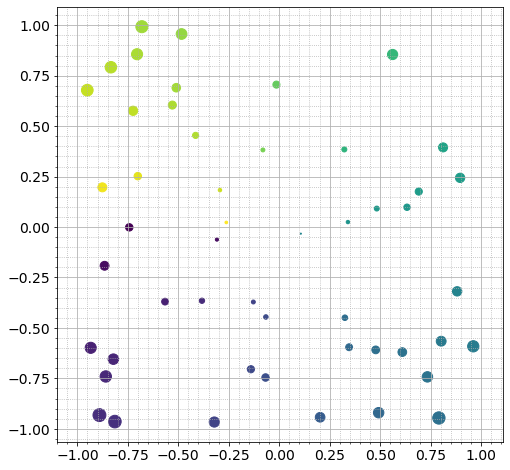

In [47]:
rg = np.random.default_rng(11)
data = rg.uniform(-1, 1, (50, 2))
col = np.arctan2(data[:, 1], data[:, 0])
size = 100 * np.sum(data**2, axis=1)
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], marker='o', s=size, c=col);
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.axis('equal');

## Контурные диаграммы

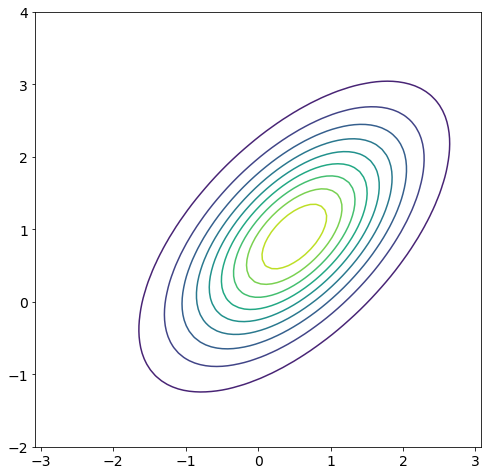

In [54]:
from scipy import stats
means, covar = (0.5, 0.9), [[1., 0.6], [0.6, 1.]]
mvn = stats.multivariate_normal(means, covar)
x, y = np.meshgrid(np.linspace(-3, 3, 80), np.linspace(-2, 4, 80))
data = np.dstack((x, y))
plt.figure(figsize=(8,8))
plt.contour(x, y, mvn.pdf(data), levels=10);
# plt.contourf(x, y, mvn.pdf(data), levels=10);
plt.axis('equal');

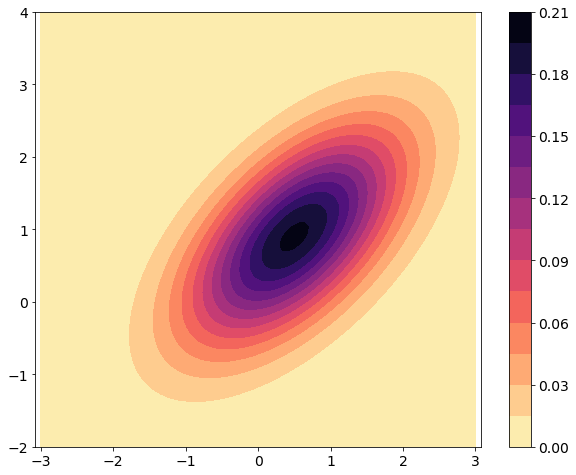

In [57]:
plt.figure(figsize=(10,8))
plt.axis('equal');
cs = plt.contourf(x, y, mvn.pdf(data), levels=15, cmap=matplotlib.cm.magma_r)
cbar = plt.colorbar(cs)

for ext in ['png', 'pdf', 'svg']:
    plt.savefig(f'figs/contourf.{ext}')

<img src="figs/mpl_fig_axes.png" width=1200></img>
<a href="https://towardsdatascience.com/the-many-ways-to-call-axes-in-matplotlib-2667a7b06e06" target="_blank">Источник</a>

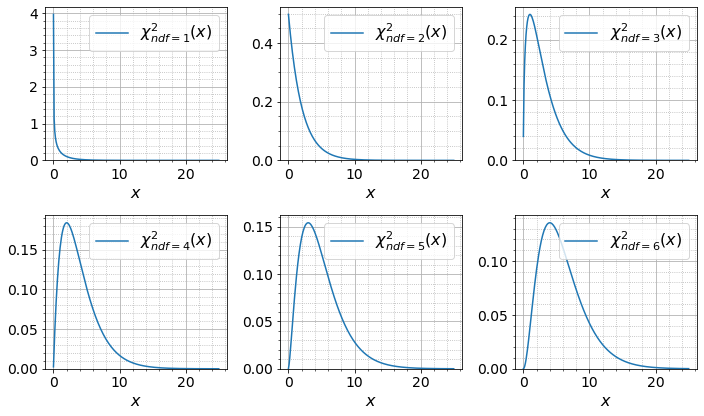

In [60]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 6))  #, sharex=True)
x = np.linspace(0.01, 25, 250)
for idx, row in enumerate(axes):
    for jdx, ax in enumerate(row):
        ndf = idx * 3 + jdx + 1
        y = stats.chi2.pdf(x, ndf)
        ax.plot(x, y, label=fr'$\chi^2_{{ndf={ndf}}}(x)$')
        ax.set_xlabel(r'$x$', fontsize=16)
        ax.set_ylim([0, 1.05*y.max()])
        ax.minorticks_on()
        ax.legend(fontsize=16)
        ax.grid(which='major')
        ax.grid(which='minor', linestyle=':')
fig.tight_layout()

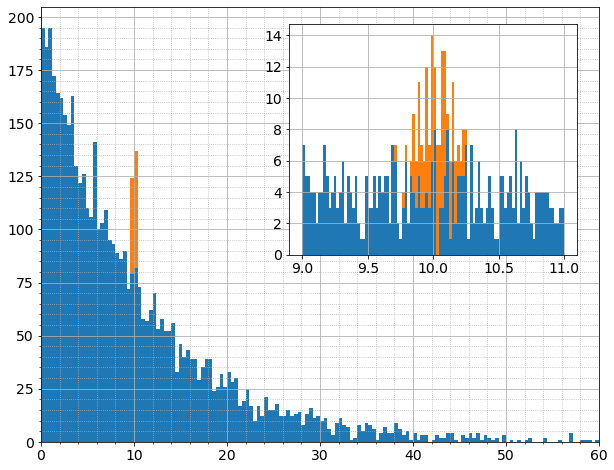

In [61]:
rg = np.random.default_rng()
x1, x2 = rg.exponential(10, 5000), rg.normal(10, 0.1, 100)
plt.figure(figsize=(10,8))
plt.hist([x1, x2], bins=150, range=(0, 60), stacked=True) # Основная гистограмма
plt.minorticks_on()
plt.xlim((0, 60))
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.axes([.47, .45, .4, .4])  # вставка
plt.hist([x1, x2], bins=100, stacked=True, range=(9, 11))
plt.grid(which='major');

# Дополнительные главы

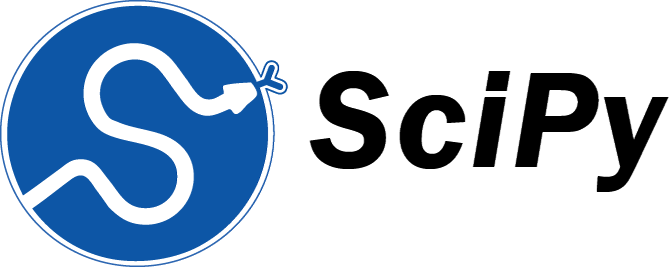

## SciPy Library
* Пакет `scipy` содержит разнообразные инструменты для научных вычислений
* Подмодули `scipy` соответствуют разным областям применения, там как интерполяция, интегрирование, оптимизация, обработки изображений, статистика, специальные функции и другие
* `scipy` можно сравнить с другими стандартными библиотеками для научных вычислений, такими как GSL

* `scipy.cluster` - Vector quantization, k-means
* `scipy.constants` - константы
* `scipy.fftpack` - преобразование Фурье
* `scipy.integrate` - интегрирование
* `scipy.interpolate` - интерполяция
* `scipy.io` - инструменты ввода-вывода
* `scipy.linalg` - линейная алгебра
* `scipy.ndimage` - обработка многомерных изображений
* `scipy.odr` - orthogonal distance regression
* `scipy.optimize` - оптимизация параметров
* `scipy.signal` - обработка сигналов
* `scipy.sparse` - разраженные матрицы
* `scipy.spatial` - пространственные структуры данных и алгоритмы
* `scipy.special` - специальные функции
* `scipy.stats` - статистика

### `scipy.special`
[docs.scipy.org/doc/scipy/reference/special.html](https://docs.scipy.org/doc/scipy/reference/special.html)

In [62]:
import scipy.special as spec

Функция Бесселя первого рода

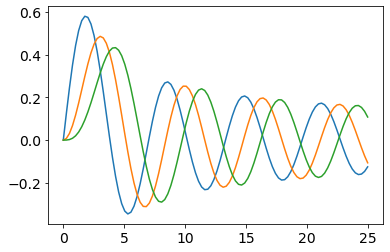

In [63]:
x = np.linspace(0, 25, 100)
plt.plot(x, spec.jn(1, x))
plt.plot(x, spec.jn(2, x))
plt.plot(x, spec.jn(3, x));

Эллиптические функции

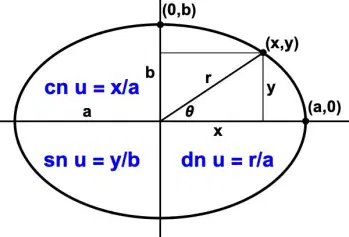

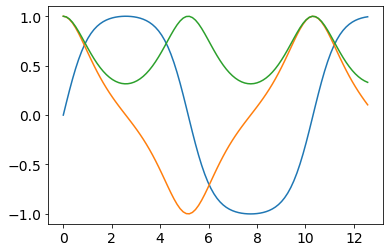

In [64]:
theta = np.linspace(0, 4*np.pi, 100)
sn, cn, dn, ph = spec.ellipj(theta, 0.9)
plt.plot(theta, sn)
plt.plot(theta, cn)
plt.plot(theta, dn);
# plt.plot(theta, ph);
# np.allclose(ph, theta)

Гамма-функция

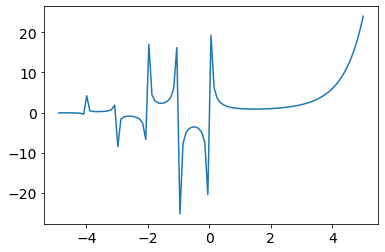

In [65]:
x = np.linspace(-5, 5, 100)
plt.plot(x, spec.gamma(x));

Логарифмическая гамма-функция

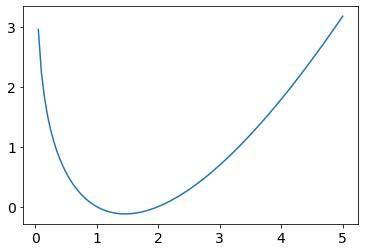

In [66]:
x = np.linspace(0, 5, 100)
plt.plot(x, spec.gammaln(x));

Функция ошибок

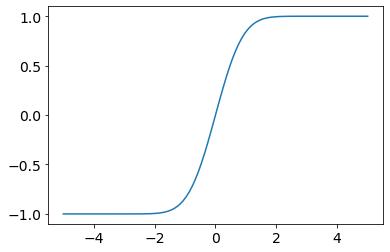

In [67]:
x = np.linspace(-5, 5, 100)
plt.plot(x, spec.erf(x));

### Численное интегрирование

In [68]:
from scipy.integrate import quad

In [69]:
quad(lambda x: spec.jv(2.5, x), 0., 4.5)

(1.1178179380783253, 7.866317250224184e-09)

* Больше примеров: [docs.scipy.org/doc/scipy/reference/tutorial/integrate.html](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)
* Полная документация: [docs.scipy.org/doc/scipy/reference/integrate.html](https://docs.scipy.org/doc/scipy/reference/integrate.html)

### Линейная алгебра
Стандартные операции линейной алгебры
* Определитель
* Обратная матрица
* Разложение по сингулярным значениям

В основе лежат эффективные библиотеки [`BLAS`](https://ru.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms) и [`LAPACK`](https://ru.wikipedia.org/wiki/LAPACK)

In [70]:
from scipy.linalg import det, inv, svd

In [71]:
arr = np.array([[1, 2], [3, 4]])
det(arr)

-2.0

In [72]:
iarr = inv(arr)
np.allclose(np.dot(arr, iarr), np.eye(2)) # True

True

In [73]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = svd(arr)
print(uarr, spec, vharr)

[[-0.1617463  -0.98659196  0.02178164]
 [-0.47456365  0.09711667  0.87484724]
 [-0.86523261  0.13116653 -0.48390895]] [14.88982544  0.45294236  0.29654967] [[-0.45513179 -0.54511245 -0.70406496]
 [ 0.20258033  0.70658087 -0.67801525]
 [-0.86707339  0.45121601  0.21115836]]


In [74]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr) # True

True

Больше интересного можно найти в [полной документации](https://docs.scipy.org/doc/scipy/reference/linalg.html)

### Интерполяция
[Документация](https://docs.scipy.org/doc/scipy/reference/interpolate.html)  
Основан на пакете [`FITPACK`](https://packages.simplyfortran.com/package/52.html) (`Fortran`)

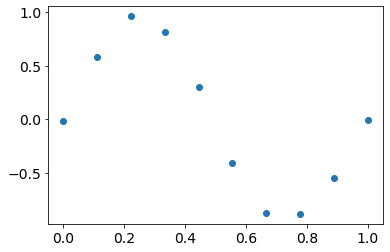

In [75]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2*np.pi * measured_time) + noise
plt.plot(measured_time, measures, 'o');

In [76]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

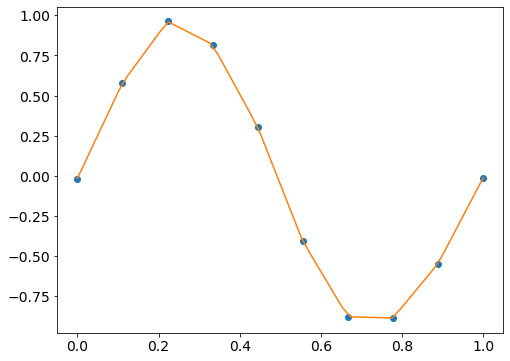

In [77]:
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
plt.figure(num=1, figsize=(8,6))
plt.plot(measured_time, measures, 'o');
plt.plot(interpolation_time, linear_results);

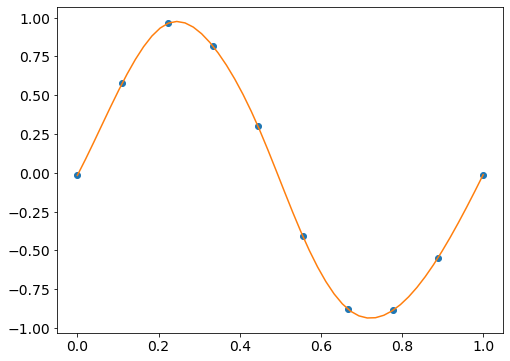

In [78]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)
plt.figure(num=2, figsize=(8,6))
plt.plot(measured_time, measures, 'o');
plt.plot(interpolation_time, cubic_results);

### Задачи оптимизации

In [79]:
from scipy.optimize import curve_fit, minimize

Аппроксимация

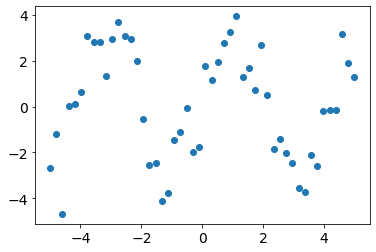

In [80]:
x = np.linspace(-5, 5, num=50)
y = 2.9 * np.sin(1.5 * x) + np.random.default_rng().normal(size=50)
plt.plot(x, y, 'o');

In [81]:
def func(x, a, b):
    return a * np.sin(b * x)

pars, cov = curve_fit(func, x, y, p0=[2, 2])
print(pars, cov)

[3.00992414 1.50208281] [[ 0.05155757 -0.00060546]
 [-0.00060546  0.00060954]]


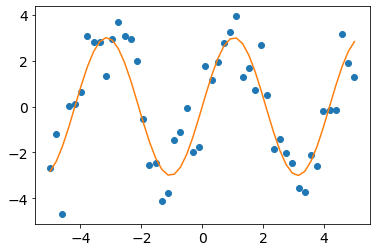

In [82]:
plt.plot(x, y, 'o')
plt.plot(x, func(x, *pars));

Поиск минимума с `minimize`

In [83]:
def f(x):
    return x**2 + 10*np.sin(x)

In [84]:
result = minimize(f, x0=0)
print(result.x)

[-1.30644012]


`minimize` может искать минимум функции нескольких переменных

### Статистика
Пакет `scipy.stats`

Содержит большое количество непрерывных (`norm`, ...) и дискретных (`bernoulli`, ...) распределений случайных величин, статистических функций (`moment`, ...) и других инструментов для статистического анализа данных

[docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)

[scipy-lectures.org/packages/statistics/index.html](http://www.scipy-lectures.org/packages/statistics/index.html)

In [85]:
import scipy.stats

In [86]:
samples = np.random.normal(size=1000)
loc, std = scipy.stats.norm.fit(samples)
loc, std

(-0.005048719853343949, 1.0251207114389524)

In [87]:
median = scipy.stats.scoreatpercentile(samples, 50)
median

-0.02042524038524382

t-критерий Стьюдента

In [88]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
scipy.stats.ttest_ind(a, b)

Ttest_indResult(statistic=-4.135375338162276, pvalue=7.029845176084753e-05)

In [89]:
?? scipy.stats.ttest_ind

### Быстрое преобразование Фурье
* `scipy.fftpack.fft()` выполняет FFT
* `scipy.fftpack.fftfreq()` генерирует частоты дискретизации
* `scipy.fftpack.ifft()` выполняет обратное FFT

[scipy-lectures.org/intro/scipy/auto_examples/plot_fftpack.html](http://www.scipy-lectures.org/intro/scipy/auto_examples/plot_fftpack.html)

In [90]:
from scipy import fftpack

In [91]:
tstep, T = 0.1, 5.
tvec = np.arange(0, 20, tstep)
sig = (np.sin(2 * np.pi / T * tvec) + 0.5 * np.random.randn(tvec.size))

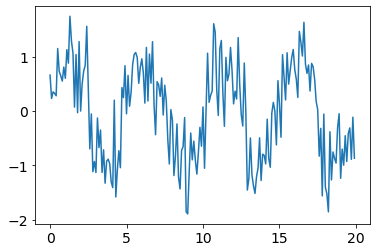

In [92]:
plt.plot(tvec, sig);

In [93]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)
# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=tstep)

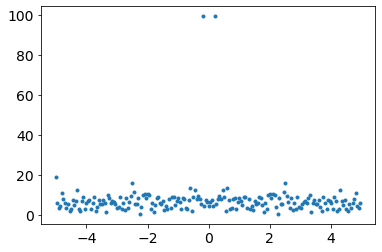

In [94]:
plt.plot(sample_freq, power, '.');

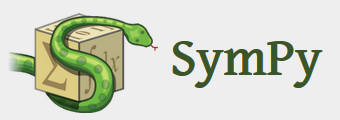

## SymPy Library
Символьные вычисления в Python
* Sympy использует `mpmath` для вычислений произвольной точности
* Используйте `subs` для вычисления функции в точке, либо для символьной замены
* Используйте `evalf` для вычисления выражения с нужной точностью

In [95]:
import sympy as sym
a = sym.Float(1)
b = sym.Rational(1, 2)
c = sym.Integer(1)
x = sym.Symbol('x')

y = x**2 + b * x + a
print(y.subs(x, 1)) # 2.5
print(y.subs(x, c)) # 2.5

2.50000000000000
2.50000000000000


In [96]:
print(sym.exp(b))
print(sym.exp(b).evalf())
print(sym.exp(b).evalf(50))

exp(1/2)
1.64872127070013
1.6487212707001281468486507878141635716537761007101


Алгебраические манипуляции

In [97]:
x = sym.Symbol('x')
z = sym.Symbol('z')
sym.expand((x + z) ** 3)

x**3 + 3*x**2*z + 3*x*z**2 + z**3

In [98]:
sym.expand(sym.cos(x + z), trig=True)

-sin(x)*sin(z) + cos(x)*cos(z)

In [99]:
sym.expand(x + z, complex=True)

re(x) + re(z) + I*im(x) + I*im(z)

In [100]:
x = sym.Symbol('x')
z = sym.Symbol('z')
sym.simplify((x + x * z) / x)

z + 1

Смотрите также `powsimp`, `trigsimp`, `logcombine` и `radsimp`

In [ ]:
?? sym.radsimp

### Calculus
* Пределы `limit(function, variable, point)`

In [101]:
sym.limit(sym.sin(x)/x, x, 0) # 1

1

In [102]:
sym.limit(x, x, sym.oo)       # oo

oo

In [103]:
sym.limit(1 / x, x, sym.oo)   # 0

0

In [104]:
sym.limit(x**x, x, 0)         # 1

1

* Дифференцирование `diff(func, var)`

In [ ]:
sym.diff(sym.sin(x), x)

In [ ]:
sym.diff(sym.sin(2 * x), x, 3)

* Интегрирование

In [ ]:
sym.integrate(6 * x**5, x)

In [ ]:
sym.integrate(sym.exp(-x ** 2) * sym.erf(x), x)

In [ ]:
sym.integrate(sym.sin(x), (x, 0, sym.pi / 2))

In [ ]:
sym.integrate(sym.exp(-x), (x, 0, sym.oo))

* Разложение в ряд `series(expr, var)`

In [ ]:
sym.series(sym.cos(x), x)

In [ ]:
sym.series(sym.cos(x), x, x0=0, n=9)

### Решение уравнений
* Поиск корней уравнения

In [ ]:
x, y, z = sym.symbols('x y z')
sym.solveset(x ** 4 - 1, x)

In [ ]:
sym.solveset(sym.exp(x) + 1, x)

In [ ]:
sym.solve((     x + 5 * y - 2,
           -3 * x + 6 * y - 15),
          (x, y))

* Разложение на множители

In [ ]:
sym.factor(x**4 - 3 * x**2 + 1)

* Булевы уравнения

In [ ]:
sym.satisfiable(x & y)

In [ ]:
sym.satisfiable(x & ~x)

* Дифференциальные уравнения

In [ ]:
f, g = sym.symbols('f g', cls=sym.Function)
sym.dsolve(f(x).diff(x, x) + f(x), f(x))

# Конец
* Навык работы с `SciPy` открывает дорогу к более продвинутым инструментам анализа данных и машинного обучения (`scikit-learn`, `tensorflow`, `xgboost`, `catboost`, ...)
* Кроме `C++` и `python` есть много интересных языков программирования. Рекомендую обратить внимание на языки `Rust` и `Julia`